In [37]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from numba import jit
from scipy.optimize import curve_fit

#### `direct-pi` function

In [24]:
@jit
def direct_pi(N):
    N_hits = 0
    for i in range(N):
        x = rd.uniform(-1, 1)
        y = rd.uniform(-1, 1)
        radii = x**2 + y**2
        if radii < 1:
            N_hits += 1
        else:
            pass

    return N_hits


def measure_direct_pi(trials):
    data_hits = [[] for i in range(len(trials))]
    k = 0
    j = 0 
    while k < len(trials):
        while j < 20:
            data_hits[k].append(direct_pi(trials[k]))
            j += 1
        k += 1
        j = 0

    pi_list = [np.array(data_hits[i])/trials[i] for i in range(len(trials))]
    pi_est = np.array(pi_list)

    dev_list = [np.mean((pi_est[i] - np.pi/4)**2) for i in range(len(pi_est))]
    dev = np.array(dev_list)

    return pi_est, dev

def plot_data(trials, est, dev):
    
    pi_est = np.array([np.mean(i) for i in est])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
    fig.tight_layout(pad=3.5)

    ax1.plot(trials, 4*pi_est, color='tab:blue')
    ax1.scatter(trials, 4*pi_est, color='tab:blue', label="Estimated Pi")
        
    ax1.axhline(np.pi, 0, trials[-1], color='tab:red', label="Pi")
    ax1.set_xlabel("log(N)")
    ax1.set_ylabel( r"$4N_{hits}/N$")
    ax1.set_xscale('log')
    ax1.grid(alpha=0.25)
    ax1.legend()
    ax1.set_title("Estimation of Pi v/s number of trials")

    ax2.scatter(trials, dev)
    ax2.plot(trials, dev)
    ax2.set_xlabel("log(N)")
    ax2.set_ylabel( r"$\langle (N_{hits}/N - \pi/4)^2 \rangle$")
    ax2.set_xscale('log')
    ax2.grid(alpha=0.25)
    ax2.set_title("Devitation of Estimated Pi v/s number of trials")


In [29]:
trials = np.array([10**i for i in range(1, 9)])

results = measure_direct_pi(trials)

### Consideracón: El siguiente gráfico discrepa respecto del mostrado en el informe debido a que se calculó en otra run posterior a la extracción de los resultados.

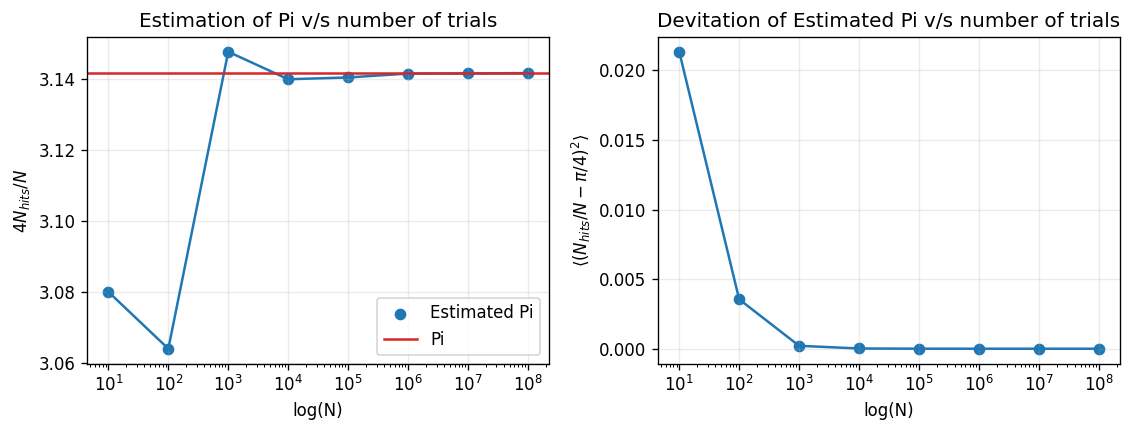

In [30]:
#print(results[1])
plot_data(trials, results[0], results[1])

In [56]:


def plot_data2(trials, est, dev):
    
    pi_est = np.array([np.mean(i) for i in est])

    fig,  ax2 = plt.subplots(1, 1, figsize=(6, 4), dpi=120)


    ax2.scatter(trials, dev)
    ax2.plot(trials, dev)
    #ax2.plot(trials, linear_fit(trials, *popt))
    ax2.set_xlabel("log(N)")
    ax2.set_ylabel( r"log($\langle (N_{hits}/N - \pi/4)^2 \rangle$)")
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.grid(alpha=0.25)
    ax2.set_title("Devitation of Estimated Pi v/s number of trials")

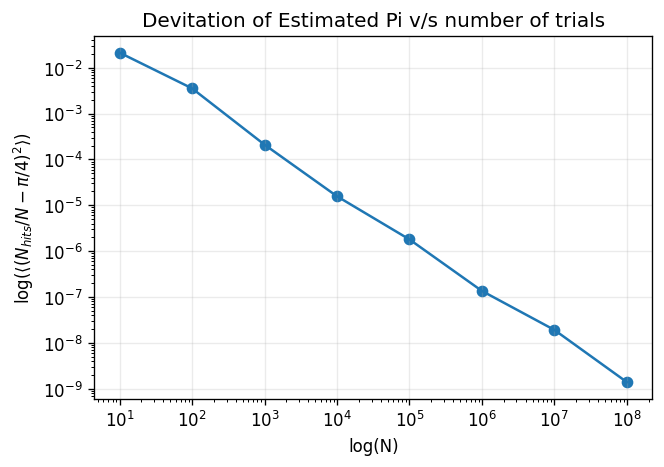

In [57]:
plot_data2(trials, results[0], results[1])